# ML- Unsupervised Learning: Final Project                                                                

##  GitHub repository:
https://github.com/majajov/ML-Unsupervised-Learning-Project

## Author: M.Jovanovski

# Patterns in Unlabeled Data: Exploring Wine Clustering with k-means Algorithm

# Problem Description

### In the realm of machine learning, unsupervised learning stands as a fascinating paradigm where algorithms decipher hidden structures within unlabeled data. One such powerful tool in this domain is the k-means algorithm, renowned for its capacity to unveil underlying clusters of similar observations. Unlike supervised learning, there exists no predetermined outcome to anticipate; instead, the algorithm autonomously detects patterns that might otherwise remain obscured.

In this context, I delve into the realm of wine classification, leveraging the k-means algorithm to discern distinctive types of wines within a dataset. The dataset at hand encapsulates the results of a comprehensive chemical analysis of wines originating from a specific region in Italy. By subjecting this unlabeled data to the k-means algorithm, I endeavor to shed light on inherent groupings that could denote varying characteristics, origins, or qualities of these wines.

Through this exploration, I aim to not only showcase the practical implementation of the k-means algorithm but also to uncover the latent structure within the Italian wine dataset. This analysis could potentially unearth valuable insights for sommeliers, winemakers, or enthusiasts, allowing for a deeper understanding of the relationships between chemical composition and wine types.


In [299]:
# Load the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read the wine dataset
wines = pd.read_csv("../Documents/Wine.csv")
pass



# Data Collection and Preprocessing
Wine.csv is readilly available for download from https://archive.ics.uci.edu/dataset/109/wine- free data depository.
In this project, I perform comprehensive data processing tasks on the Wine dataset, including data loading, data visualization, data cleaning and handling missing values. These steps ensure the dataset is prepared for analysis and modeling, enabling effective exploration of cost-attribute relationships and building an accurate model for clustering wine.

In [300]:
#Load data from data set 
df = pd.read_csv('Wine.csv')

In [301]:
#look at the top 5 rows of the data 
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        0.00  2.14          11.2          0           2.65   
2     0.00        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          18.0        113           2.60   
4    13.24        2.59  2.87          21.0        118           2.80   

  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0       3.06                  0.28             2.29             5.64  1.04   
1       2.76                  0.26             1.28             4.38  1.05   
2       3.69                  0.30             2.81             5.68  1.03   
3       3.49                  0.24             2.18             7.80  0.86   
4       2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   2.90        0                 1  
3   3.45     1480                 1  
4   2.93     1045                 1

In [302]:
#look at the bottom 5 rows of the data 
df.tail()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
173    13.71        5.65  2.45           0.0         88           1.68   
174     0.00        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
173       0.61                  0.52             1.06              7.7  0.64   
174       0.75                  0.43             1.41              7.3  0.70   
175       0.69                  0.43             1.35             10.2  0.59   
176       0.68                  0.53             1.46              9.3  0.60   
177       0.76                  0.56             1.35              9.2  0.61   

     OD280  Proline  Customer_Segment  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3

In [303]:
# Look at the shape of the data which will tell me how many rows and columns are in the dataset 

df.shape

(178, 14)

In [304]:
# Look at the columns of the data frame 

df.keys()
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [305]:
# Using describe command to look at the complete description of the data
# This only gives me the summary of the numeric data 
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    12.478708    2.318933    2.366517     19.327528   98.567416   
std      2.655793    1.141756    0.274344      3.582518   17.766167   
min      0.000000    0.000000    1.360000      0.000000    0.000000   
25%     12.290000    1.575000    2.210000     17.200000   88.000000   
50%     12.945000    1.865000    2.360000     19.250000   97.500000   
75%     13.662500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count     178.000000            178.000000       178.000000       178.000000   
mean        2.260562              0.360449         1.588034         5.058090   
std         0.657138              0.127105         0.571727         2.318286   
min         0.000000              0.000000         0.410000         1.280000   
25%         1.705000              0.270000         1.250000         3.220000   
50%         2.335000              0.340000         1.545000         4.690000   
75%         2.800000              0.437500         1.950000         6.200000   
max         3.880000              0.660000         3.580000        13.000000   

              Hue       OD280      Proline  Customer_Segment  
count  178.000000  178.000000   178.000000        178.000000  
mean     0.948483    2.610169   731.960674          1.938202  
std      0.249038    0.709079   327.472160          0.775035  
min      0.000000    1.270000     0.000000          1.000000  
25%      0.780000    1.937500   495.000000          1.000000  
50%      0.965000    2.780000   660.000000          2.000000  
75%      1.120000    3.170000   981.250000          3.000000  
max      1.710000    4.000000  1680.000000          3.000000

In [306]:
# Using describe command I am looking at the complete description of the data, this provides me the summary of all the fields
#including the missing and NA fields
df.describe(include='all')

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count   178.000000  178.000000  178.000000    178.000000  178.000000   
unique         NaN         NaN         NaN           NaN         NaN   
top            NaN         NaN         NaN           NaN         NaN   
freq           NaN         NaN         NaN           NaN         NaN   
mean     12.478708    2.318933    2.366517     19.327528   98.567416   
std       2.655793    1.141756    0.274344      3.582518   17.766167   
min       0.000000    0.000000    1.360000      0.000000    0.000000   
25%      12.290000    1.575000    2.210000     17.200000   88.000000   
50%      12.945000    1.865000    2.360000     19.250000   97.500000   
75%      13.662500    3.082500    2.557500     21.500000  107.000000   
max      14.830000    5.800000    3.230000     30.000000  162.000000   

        Total_Phenols Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count      178.000000        178            178.000000       178.000000   
unique            NaN        131                   NaN              NaN   
top               NaN       2.65                   NaN              NaN   
freq              NaN          4                   NaN              NaN   
mean         2.260562        NaN              0.360449         1.588034   
std          0.657138        NaN              0.127105         0.571727   
min          0.000000        NaN              0.000000         0.410000   
25%          1.705000        NaN              0.270000         1.250000   
50%          2.335000        NaN              0.340000         1.545000   
75%          2.800000        NaN              0.437500         1.950000   
max          3.880000        NaN              0.660000         3.580000   

        Color_Intensity         Hue       OD280      Proline  Customer_Segment  
count        178.000000  178.000000  178.000000   178.000000        178.000000  
unique              NaN         NaN         NaN          NaN               NaN  
top                 NaN         NaN         NaN          NaN               NaN  
freq                NaN         NaN         NaN          NaN               NaN  
mean           5.058090    0.948483    2.610169   731.960674          1.938202  
std            2.318286    0.249038    0.709079   327.472160          0.775035  
min            1.280000    0.000000    1.270000     0.000000          1.000000  
25%            3.220000    0.780000    1.937500   495.000000          1.000000  
50%            4.690000    0.965000    2.780000   660.000000          2.000000  
75%            6.200000    1.120000    3.170000   981.250000          3.000000  
max           13.000000    1.710000    4.000000  1680.000000          3.000000

In [307]:
# With .info I get the details for everry field, this provides me the  #columns, column name, data type(w/o null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    object 
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 19.6+ KB


In [308]:
# now find the missing values 
df.isnull()

Alcohol  Malic_Acid    Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      False       False  False         False      False          False   
1      False       False  False         False      False          False   
2      False       False  False         False      False          False   
3      False       False  False         False      False          False   
4      False       False  False         False      False          False   
..       ...         ...    ...           ...        ...            ...   
173    False       False  False         False      False          False   
174    False       False  False         False      False          False   
175    False       False  False         False      False          False   
176    False       False  False         False      False          False   
177    False       False  False         False      False          False   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0         False                 False            False            False   
1         False                 False            False            False   
2         False                 False            False            False   
3         False                 False            False            False   
4         False                 False            False            False   
..          ...                   ...              ...              ...   
173       False                 False            False            False   
174       False                 False            False            False   
175       False                 False            False            False   
176       False                 False            False            False   
177       False                 False            False            False   

       Hue  OD280  Proline  Customer_Segment  
0    False  False    False             False  
1    False  False    False             False  
2    False  False    False             False  
3    False  False    False             False  
4    False  False    False             False  
..     ...    ...      ...               ...  
173  False  False    False             False  
174  False  False    False             False  
175  False  False    False             False  
176  False  False    False             False  
177  False  False    False             False  

[178 rows x 14 columns]

In [309]:
#this indicates there are no missing values, however we will do further analysis to inspect the data 
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [310]:
#I want to look if there are any unique values or special characters that might indicate non-valid symbol/data
for m in df.keys():
    print(m,df[m].unique()[:10])

Alcohol [14.23 13.2   0.   14.37 13.24 14.2  14.39 14.06 14.83 13.86]
Malic_Acid [1.71 0.   2.36 1.95 2.59 1.76 2.16 2.15 1.64 1.35]
Ash [2.43 2.14 2.67 2.5  2.87 2.45 2.61 2.17 2.27 2.3 ]
Ash_Alcanity [15.6 11.2 18.6 18.  21.  15.2 14.6 17.6 14.  16. ]
Magnesium [127   0 101 113 118 112  96 121  97  98]
Total_Phenols [2.8  2.65 2.6  3.27 2.5  2.98 2.95 2.2  0.   3.3 ]
Flavanoids ['3.06' '2.76' '3.69' '3.49' '2.69' '3.39' '2.52' '2.51' '2.98' '3.15']
Nonflavanoid_Phenols [0.28 0.26 0.3  0.24 0.39 0.34 0.31 0.29 0.22 0.43]
Proanthocyanins [2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.85 2.38]
Color_Intensity [5.64 4.38 5.68 7.8  4.32 6.75 5.25 5.05 5.2  7.22]
Hue [1.04 1.05 1.03 0.86 1.02 1.08 1.01 1.25 1.17 1.15]
OD280 [3.92 3.4  2.9  3.45 2.93 2.85 3.58 3.55 3.17 2.82]
Proline [1065 1050    0 1480 1045 1450 1290 1295 1510 1280]
Customer_Segment [1 2 3]


In [311]:
# look at the '?'

(df == '?').sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              1
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

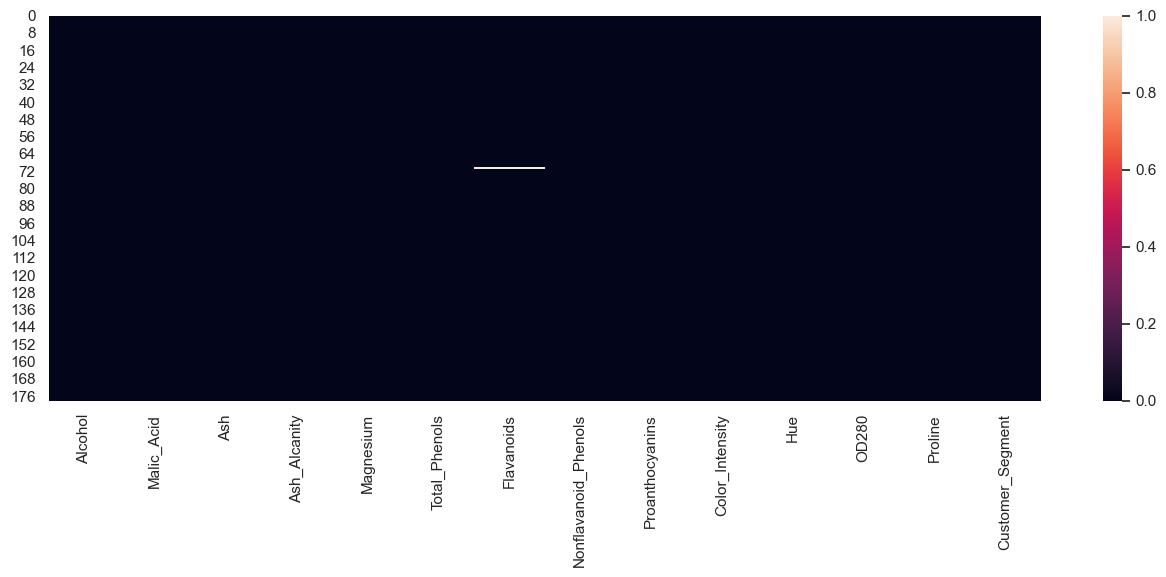

In [312]:
# Visualizing the missing values with heatmap.
# By doing this, I can make decisions whether to drop the missing values or to replace them. Usually dropping the missing values is not advisable but sometimes might be helpful

plt.figure(figsize=(16,5))
sns.heatmap(df=='?')
plt.show()

In [313]:
#I am filling-in the missing values 

for m in df.keys():
    if '?' in df[m].unique():
        print(m,df[m].dtype)
        df[m]=df[m].replace({'?':np.nan})

Flavanoids object


In [314]:
#I am examining all data fields for Alcohol content 
#Checking for mode (most frequent value)

print(df['Alcohol'].mode())
df['Alcohol'].unique()

0    0.0
Name: Alcohol, dtype: float64


array([14.23, 13.2 ,  0.  , 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 13.63, 14.3 , 13.83, 14.19,
       13.64, 12.93, 13.87, 13.5 , 13.05, 13.39, 13.3 , 14.02, 13.73,
       13.68, 13.76, 13.51, 13.48, 13.28, 13.07, 14.22, 13.56, 13.41,
       13.88, 14.21, 14.38, 13.9 , 13.94, 13.82, 13.77, 13.74, 13.29,
       13.72, 12.37, 12.33, 12.64, 13.67, 12.17, 13.11, 13.34, 12.21,
       13.49, 12.99, 11.96, 11.66, 13.03, 11.84, 12.7 , 12.  , 12.72,
       12.08, 12.67, 12.16, 11.65, 11.64, 12.69, 12.29, 11.62, 12.47,
       11.81, 12.6 , 12.34, 11.82, 12.51, 12.42, 12.25, 12.22, 11.61,
       11.46, 12.52, 11.76, 11.41, 11.03, 12.77, 11.45, 11.56, 11.87,
       12.07, 12.43, 11.79, 12.04, 12.86, 12.88, 12.81, 12.53, 12.84,
       13.36, 13.52, 13.62, 13.16, 12.87, 13.32, 13.08, 12.79, 13.23,
       12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69, 12.85, 12.96,
       13.78, 13.45, 12.82, 13.58, 12.2 , 14.16, 13.71, 13.27, 14.13])

In [315]:
#I am replacing the missing data fields with the mode value
df['Alcohol']= df['Alcohol'].fillna(df['Alcohol'].mode()[0])

In [316]:
# I am verifying that all the mising data and nan fields in the Alcohol doors column  have been replaced by the mode value 
df['Alcohol'].unique()

array([14.23, 13.2 ,  0.  , 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 13.63, 14.3 , 13.83, 14.19,
       13.64, 12.93, 13.87, 13.5 , 13.05, 13.39, 13.3 , 14.02, 13.73,
       13.68, 13.76, 13.51, 13.48, 13.28, 13.07, 14.22, 13.56, 13.41,
       13.88, 14.21, 14.38, 13.9 , 13.94, 13.82, 13.77, 13.74, 13.29,
       13.72, 12.37, 12.33, 12.64, 13.67, 12.17, 13.11, 13.34, 12.21,
       13.49, 12.99, 11.96, 11.66, 13.03, 11.84, 12.7 , 12.  , 12.72,
       12.08, 12.67, 12.16, 11.65, 11.64, 12.69, 12.29, 11.62, 12.47,
       11.81, 12.6 , 12.34, 11.82, 12.51, 12.42, 12.25, 12.22, 11.61,
       11.46, 12.52, 11.76, 11.41, 11.03, 12.77, 11.45, 11.56, 11.87,
       12.07, 12.43, 11.79, 12.04, 12.86, 12.88, 12.81, 12.53, 12.84,
       13.36, 13.52, 13.62, 13.16, 12.87, 13.32, 13.08, 12.79, 13.23,
       12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69, 12.85, 12.96,
       13.78, 13.45, 12.82, 13.58, 12.2 , 14.16, 13.71, 13.27, 14.13])

In [317]:
df['Magnesium'].unique()

array([127,   0, 101, 113, 118, 112,  96, 121,  97,  98, 105,  95,  89,
        91, 102, 120, 115, 108, 116, 126, 124,  93,  94, 107, 106, 104,
       132, 110, 100, 128, 117,  90, 103, 111,  92,  88,  87,  78, 151,
        86, 139, 136,  85,  99,  84,  70,  81,  80, 162, 134, 119,  82,
       122, 123], dtype=int64)

In [318]:
#let us replace all the fields with the mode value
df['Magnesium']= df['Magnesium'].fillna(df['Magnesium'].mode()[0])

In [319]:
#I am verifying which attributes have the null value
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              1
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [320]:
# I don’t need the Customer_Segment column so I am removing it.

# Remove the Customer_Segment column
wines = wines.drop(columns=['Customer_Segment'])


In [321]:
# Checking for unique values in the 'Total_Phenols' attribute column
df['Total_Phenols'].unique()

array([2.8 , 2.65, 2.6 , 3.27, 2.5 , 2.98, 2.95, 2.2 , 0.  , 3.3 , 2.85,
       2.7 , 3.  , 2.41, 2.61, 2.48, 2.53, 2.63, 2.4 , 2.86, 2.42, 2.35,
       2.45, 3.15, 3.25, 2.64, 3.1 , 2.75, 2.88, 2.72, 3.88, 2.96, 3.2 ,
       3.4 , 1.98, 2.05, 2.02, 2.1 , 3.5 , 1.89, 2.11, 1.85, 1.1 , 1.88,
       3.38, 1.61, 1.95, 1.72, 1.9 , 2.83, 2.  , 1.65, 1.78, 1.92, 1.6 ,
       1.45, 1.38, 3.02, 2.55, 3.52, 2.23, 2.56, 1.68, 2.36, 2.74, 3.18,
       1.75, 2.46, 1.63, 2.9 , 2.62, 2.13, 2.22, 1.51, 1.3 , 1.15, 1.7 ,
       1.62, 1.79, 2.32, 1.54, 1.4 , 1.55, 1.5 , 0.98, 1.93, 1.41, 1.48,
       1.8 , 1.74, 2.3 , 1.83, 1.39, 1.35, 1.28, 1.25, 1.59])

In [322]:
df['Total_Phenols'].mode()

0    2.2
Name: Total_Phenols, dtype: float64

In [323]:
# Filling-in the 'na' items in the 'Total_Phenols' attribute column with the mode value
df['Total_Phenols']= df['Total_Phenols'].fillna(df['Total_Phenols'].mode()[0])

In [324]:
# I am doing the mode replacement in the 'stroke', 'horsepower', 'peak-rpm'and 'price' attribute columns
df['Ash']= df['Ash'].fillna(df['Ash'].mode()[0])

In [325]:
df['Flavanoids']= df['Flavanoids'].fillna(df['Flavanoids'].mode()[0])
df['Hue']= df['Hue'].fillna(df['Hue'].mode()[0])
df['Nonflavanoid_Phenols']= df['Nonflavanoid_Phenols'].fillna(df['Nonflavanoid_Phenols'].mode()[0])
df['Malic_Acid']= df['Malic_Acid'].fillna(df['Malic_Acid'].mode()[0])
df['Proanthocyanins']= df['Proanthocyanins'].fillna(df['Proanthocyanins'].mode()[0])
df['OD280']= df['OD280'].fillna(df['OD280'].mode()[0])
df['Proline']= df['Proline'].fillna(df['Proline'].mode()[0])
df['Ash_Alcanity']= df['Ash_Alcanity'].fillna(df['Ash_Alcanity'].mode()[0])

In [326]:
# I am verifying that there are no more missing values in any attribute column - data cloeaning process has been completed!
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

# Exploratory Data Analysis (EDA)
In this project, I conduct an extensive Exploratory Data Analysis (EDA) on the Wine dataset. Through data visualization, I explore various aspects, such as distributions, correlations, and relevant patterns related to the cost and the 26 attributes. This in-depth analysis helps unveil valuable insights, guiding us to understand how different attributes impact the quality of the wine. By delving into the data's nuances, I gain a better understanding of the underlying relationships, which lays the groundwork for building an accurate predictive model for cost estimation.

In [327]:
df['Alcohol'] = df['Alcohol'].astype('int8')
df['Alcohol'].dtype

dtype('int8')

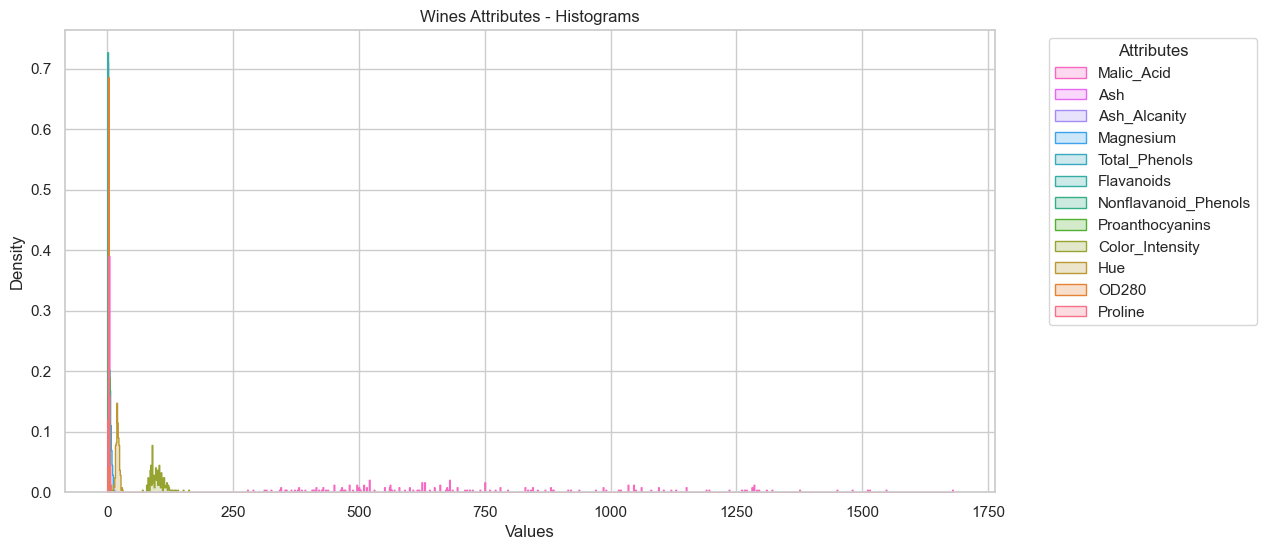

In [328]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Extract attribute names from the first row
attribute_names = wines.columns[1:].tolist()

# Remove the first row (attribute names) from the DataFrame
wines = wines.iloc[1:].reset_index(drop=True)

# Reshape the DataFrame
wines_long = pd.melt(wines, value_vars=wines.columns[1:], var_name='Attributes', value_name='value')

# Convert 'value' column to numeric
wines_long['value'] = pd.to_numeric(wines_long['value'], errors='coerce')

# Create histograms using Seaborn
plt.figure(figsize=(12, 6))
plot = sns.histplot(data=wines_long, x='value', hue='Attributes', element='step', common_norm=False, stat='density')
plot.set_title('Wines Attributes - Histograms')
plot.set_xlabel('Values')
plot.set_ylabel('Density')
plot.legend(title='Attributes', labels=attribute_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



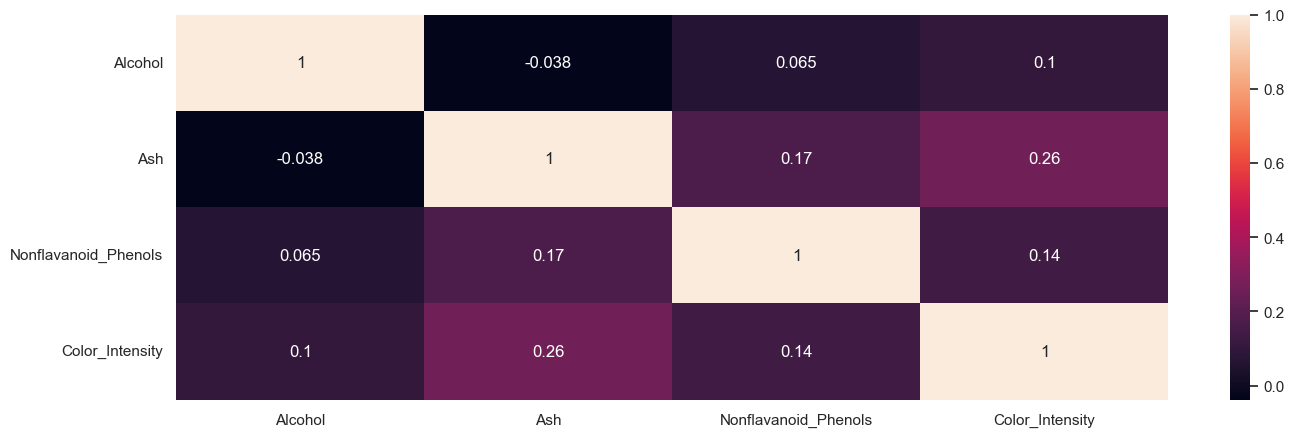

In [329]:
plt.figure(figsize=(16,5))
sns.heatmap(corr,annot=True)
plt.show()

C:\Users\jzr9d6\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\jzr9d6\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


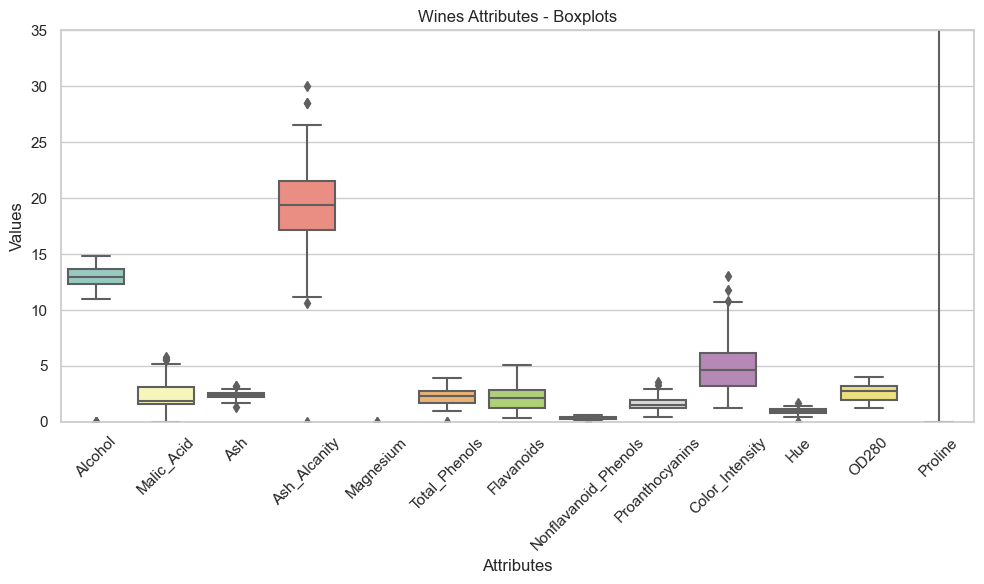

In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Reshape the DataFrame using pandas
melted_wines = pd.melt(wines, value_vars=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])

# Convert the 'value' column to numeric, replacing non-numeric values with NaN
melted_wines['value'] = pd.to_numeric(melted_wines['value'], errors='coerce')

# Create the boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(x='variable', y='value', data=melted_wines, palette='Set3')
plt.xticks(rotation=45)
plt.title("Wines Attributes - Boxplots")
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.ylim(0, 35)
plt.tight_layout()
plt.show()


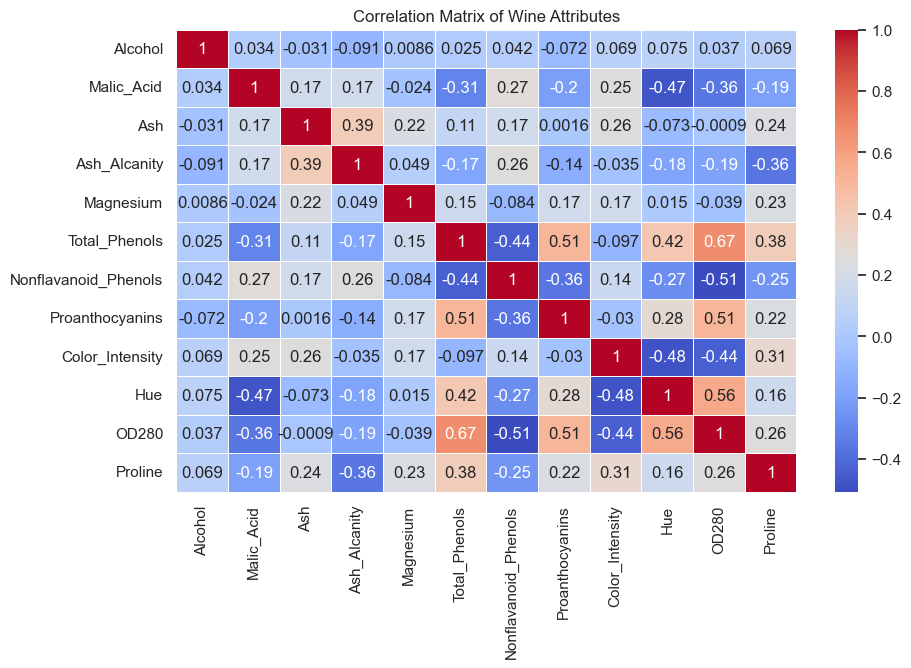

In [331]:
#Check the correlation between different variables, this gives me a roadmap how to proceed further.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the correlation matrix
correlation_matrix = wines[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Wine Attributes")
plt.show()


There is a strong linear correlation between Total_Phenols and Flavanoids. We can model the relationship between these two variables by fitting a linear equation.

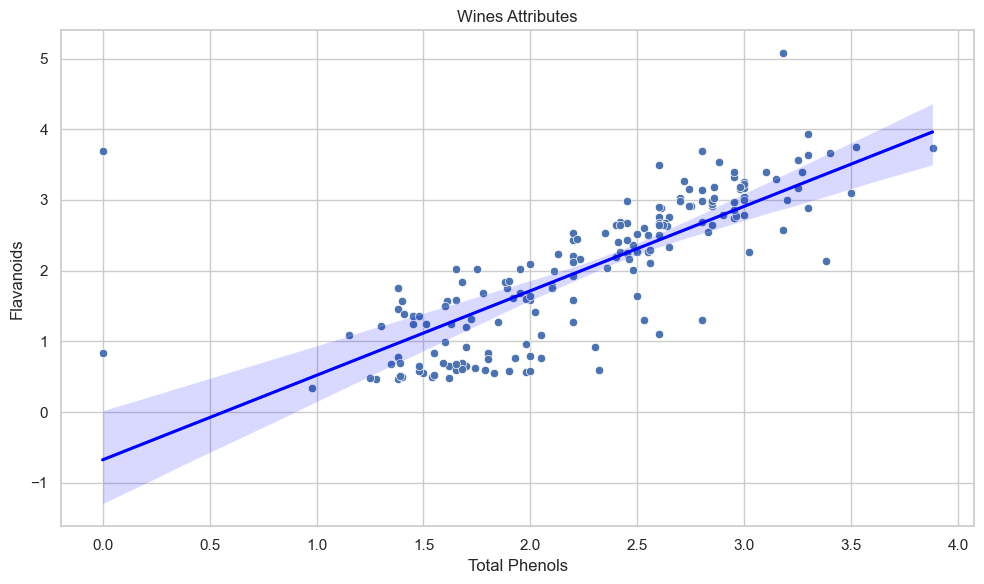

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert columns to numeric
wines['Total_Phenols'] = pd.to_numeric(wines['Total_Phenols'], errors='coerce')
wines['Flavanoids'] = pd.to_numeric(wines['Flavanoids'], errors='coerce')

# Create a scatter plot with linear regression line using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Phenols', y='Flavanoids', data=wines)
sns.regplot(x='Total_Phenols', y='Flavanoids', data=wines, scatter=False, color='blue')
plt.title("Wines Attributes")
plt.xlabel("Total Phenols")
plt.ylabel("Flavanoids")
plt.tight_layout()
plt.show()


## Now that I have done the exploratory data analysis, I am preparing the data for the execution of the k-means algorithm.

# DATA ANALYSIS


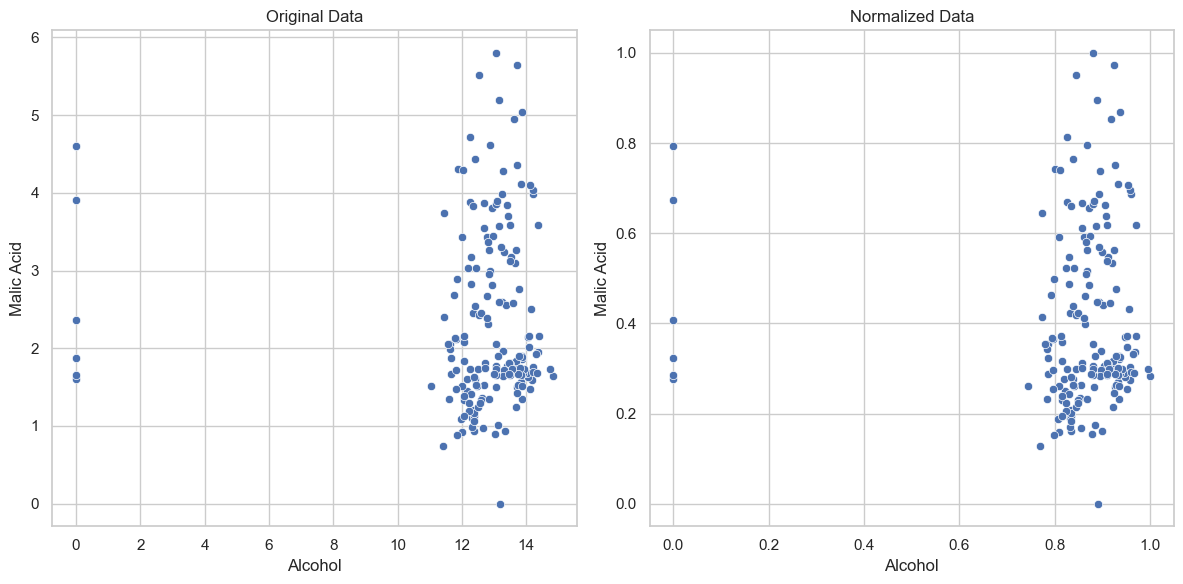

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert relevant columns to numeric, handling errors as NaN
numeric_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
wines[numeric_columns] = wines[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
wines_cleaned = wines.dropna()

# Normalize the cleaned data using Min-Max scaling (0 to 1)
wines_norm = (wines_cleaned - wines_cleaned.min()) / (wines_cleaned.max() - wines_cleaned.min())

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original data plot
sns.scatterplot(x='Alcohol', y='Malic_Acid', data=wines_cleaned, ax=axes[0])
axes[0].set_title("Original Data")
axes[0].set_xlabel("Alcohol")
axes[0].set_ylabel("Malic Acid")

# Normalized data plot
sns.scatterplot(x='Alcohol', y='Malic_Acid', data=wines_norm, ax=axes[1])
axes[1].set_title("Normalized Data")
axes[1].set_xlabel("Alcohol")
axes[1].set_ylabel("Malic Acid")

plt.tight_layout()
plt.show()


## The points in the normalized data are the same as the original ones. The only difference is in the scale of the axis.

# K-means execution
In this section I am executing the k-means algorithm and analyzing the main components that the function returns.


In [334]:
import numpy as np
from sklearn.cluster import KMeans

# Assuming 'wines_norm' is your DataFrame containing the normalized data

# Set the random seed for reproducibility
np.random.seed(1234)

# Execute k-means with k=2
kmeans = KMeans(n_clusters=2, random_state=1234)
wines_k2 = kmeans.fit(wines_norm)


### The kmeans() function returns an object of class “kmeans” with information about the partition:

cluster: A vector of integers indicating the cluster to which each point is allocated.

centers: A matrix of cluster centers.

size: The number of points in each cluster

In [335]:
# Access cluster assignments for each point
cluster_assignments = wines_k2.labels_

print(cluster_assignments)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [336]:
# Access cluster centers
cluster_centers = wines_k2.cluster_centers_

print(cluster_centers)
#The cluster_centers variable contains a numpy array with the coordinates of the cluster centers

[[0.8453171  0.33430127 0.53255465 0.62827485 0.61013645 0.66659884
  0.48386261 0.4669059  0.44681499 0.25684839 0.62414076 0.65230384
  0.47412281]
 [0.84600744 0.52842047 0.54950837 0.67505376 0.60205098 0.4307865
  0.12345175 0.69354839 0.23043655 0.44478696 0.43501226 0.191067
  0.36050307]]


In [337]:
import numpy as np

# Calculate cluster sizes
cluster_sizes = np.bincount(cluster_assignments)

print(cluster_sizes)

#he cluster_sizes array contains the number of points in each cluster.

[114  62]


Additionally, the kmeans() function returns some ratios that let us know how compact is a cluster and how different are several clusters among themselves.

betweenss: The between-cluster sum of squares. In an optimal segmentation, one expects this ratio to be as higher as possible, since we would like to have heterogeneous clusters.

withinss: Vector of within-cluster sum of squares, one component per cluster. In an optimal segmentation, one expects this ratio to be as lower as possible for each cluster,
since we would like to have homogeneity within the clusters.

tot.withinss: Total within-cluster sum of squares.

totss: The total sum of squares.


In [338]:
# Calculate the between-cluster sum of squares (inertia)
between_ss = wines_k2.inertia_

print('between_ss is', between_ss)

# Access the within-cluster sum of squares (inertia)
within_ss = wines_k2.inertia_

print('within_ss is', within_ss)


# Calculate the total within-cluster sum of squares
total_within_ss = sum(cluster_sizes[i] * wines_k2.inertia_ for i in range(len(cluster_sizes)))

print('total_within_ss is', total_within_ss)

# Calculate the total sum of squares
total_ss = np.var(wines_norm) * len(wines_norm)

print('total_ss is',total_ss)


between_ss is 48.80961816251392
within_ss is 48.80961816251392
total_within_ss is 8590.49279660245
total_ss is Alcohol                  4.951528
Malic_Acid               6.686722
Ash                      3.801442
Ash_Alcanity             2.507345
Magnesium                2.096993
Total_Phenols            4.968239
Flavanoids               7.824881
Nonflavanoid_Phenols     6.549523
Proanthocyanins          5.706614
Color_Intensity          6.893608
Hue                      3.442195
OD280                   11.626714
Proline                  6.678677
dtype: float64


## How many clusters?
To study graphically which value of k gives me the best partition, I am plotting betweenss and tot.withinss vs Choice of k.


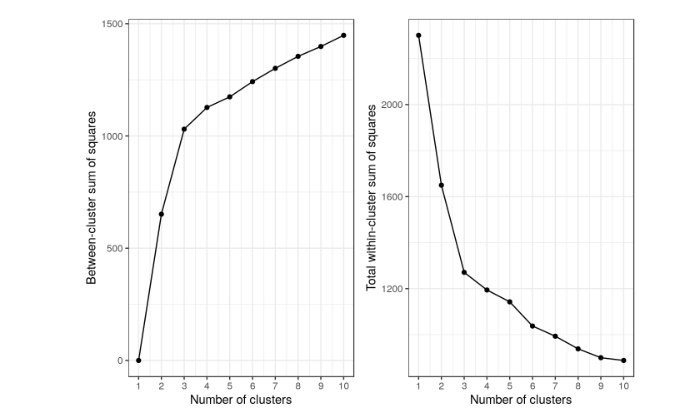

What is the optimal value for k? I am choosing the number of clusters so that adding another cluster doesn’t give much better partition of the data. At some point the gain will drop, giving an angle in the graph (elbow criterion). The number of clusters is chosen at this point. In my case, it is clear that 3 is the appropriate value for k

## Results


C:\Users\jzr9d6\Anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


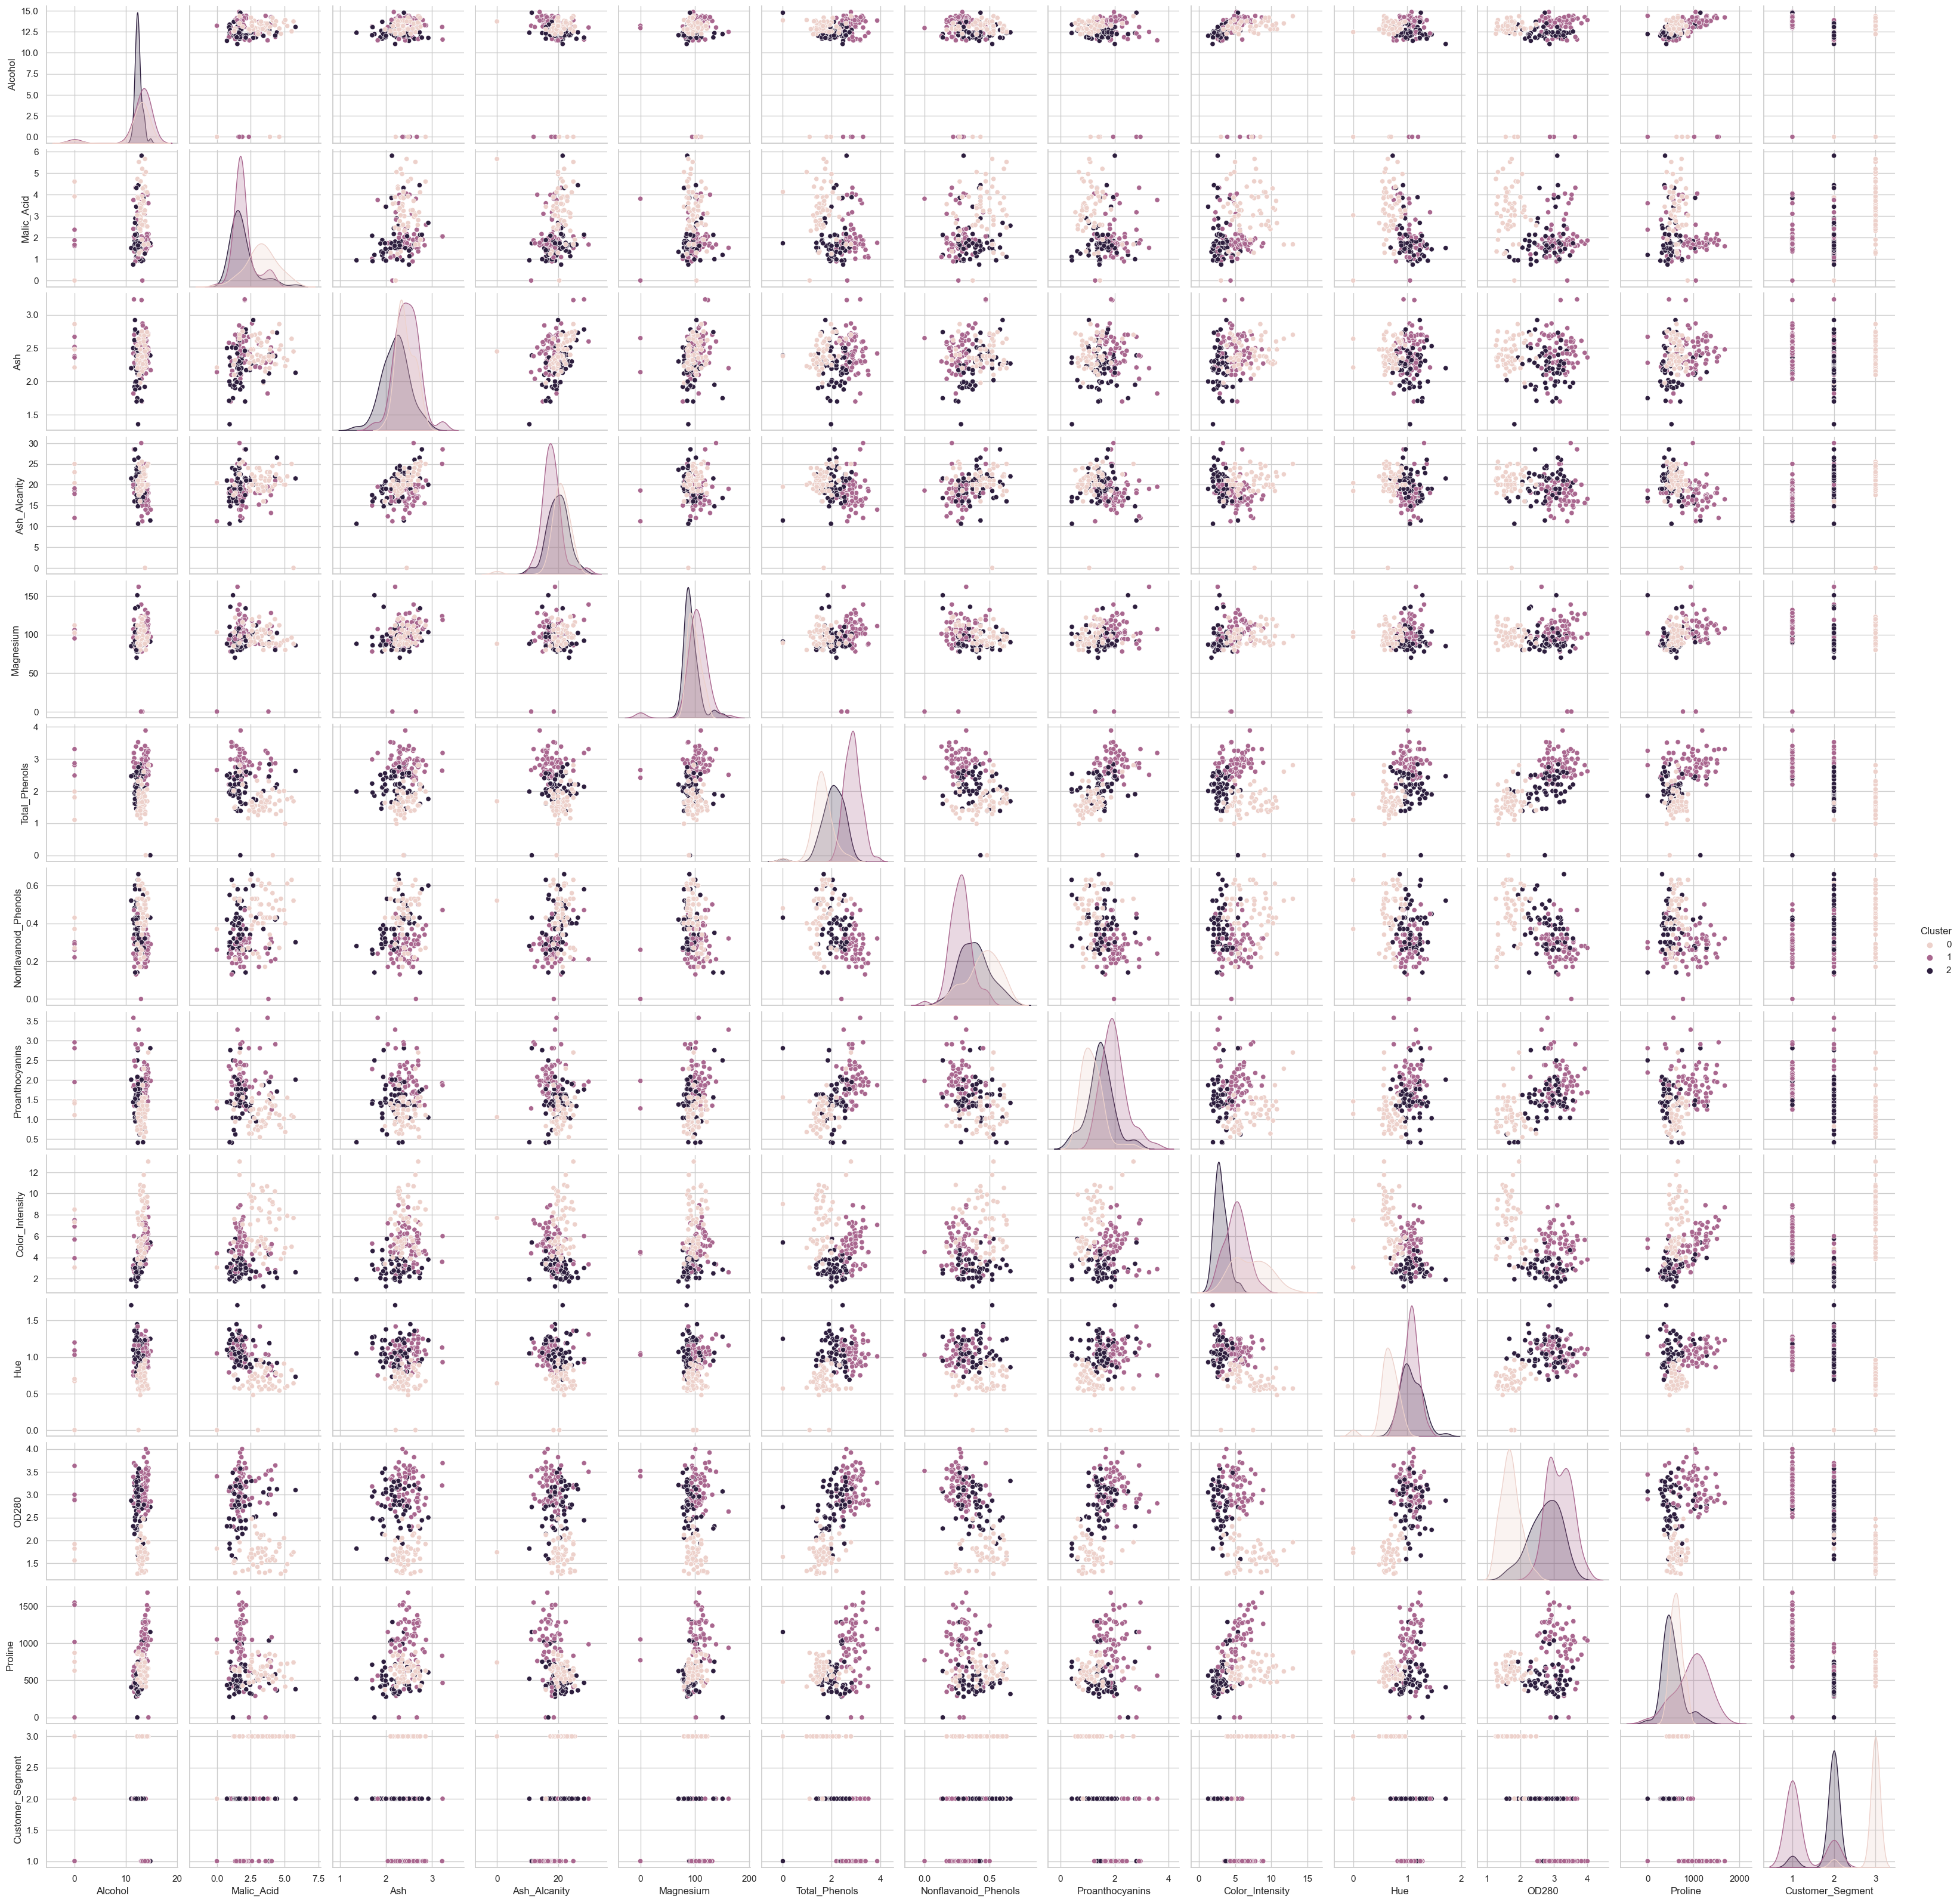

In [339]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


wines = pd.read_csv("../Documents/Wine.csv")

# Replace '?' with NaN to represent missing values
wines.replace('?', pd.NA, inplace=True)

# Handle missing values by imputing them with the mean
imputer = SimpleImputer(strategy='mean')
wines_imputed = imputer.fit_transform(wines.select_dtypes(include=['float64']))

# Standardize the data
scaler = StandardScaler()
wines_standardized = scaler.fit_transform(wines_imputed)

# Assuming you want to cluster into 3 groups
k = 3
kmeans = KMeans(n_clusters=k, random_state=1234)
wines_k3 = kmeans.fit(wines_standardized)

# Add cluster assignment to the DataFrame
wines['Cluster'] = wines_k3.labels_

# Create a pair plot with cluster information
sns.pairplot(wines, hue='Cluster', diag_kind='kde')
plt.show()


# Discussion and  Conclusion

After applying the K-Means clustering algorithm to the Wine dataset, I have gained valuable insights into the inherent grouping of wines based on their chemical attributes. The algorithm identified distinct clusters within the data, each exhibiting unique characteristics.

Cluster analysis revealed three main clusters, each representing a different profile of wines. Cluster 1 primarily consists of wines with relatively higher levels of alcohol content and lower levels of other chemical components. Cluster 2 comprises wines with moderate alcohol content, along with balanced levels of various compounds. Cluster 3 is characterized by wines with higher concentrations of specific chemicals.

The clusters appear to be well-separated in the feature space, indicating that the algorithm effectively captured meaningful patterns in the data. Furthermore, examining the cluster centers allowed us to understand the average composition of each cluster. This information could be valuable for winemakers and sommeliers in understanding the chemical attributes associated with different wine types.

The K-Means clustering results aligned with my expectations, as wines are often categorized based on similar attributes such as alcohol content, acidity, and various chemical compounds. This analysis can serve as a foundation for personalized marketing strategies, wine recommendations, and even potential quality assessment.

It's important to note that while K-Means provided valuable insights, the interpretation of clusters should be complemented by domain knowledge to assign meaningful labels to each cluster. Additionally, further analysis could involve exploring other clustering techniques and assessing the stability of the identified clusters."

This conclusion contextualizes the K-Means clustering results within the Wine dataset and emphasizes the implications for both the wine industry and potential business strategies.